In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K-means is a great general-purpose algorithm.
# Its drawbacks are that it assumes the clusters are convex (outward rounded).
# It doesn’t work well for elongated clusters.
# K-means also has drawbacks when working with very high-dimensional data

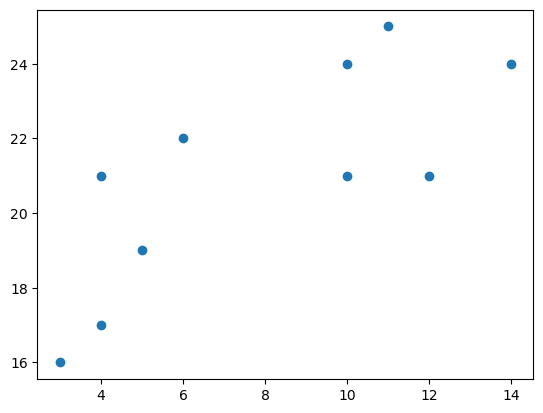

In [2]:
# Input data is 10 dots in two clusters
features = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
targets = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# Plot inputs to get an idea of how it looks like
plt.scatter(features, targets)
plt.show()

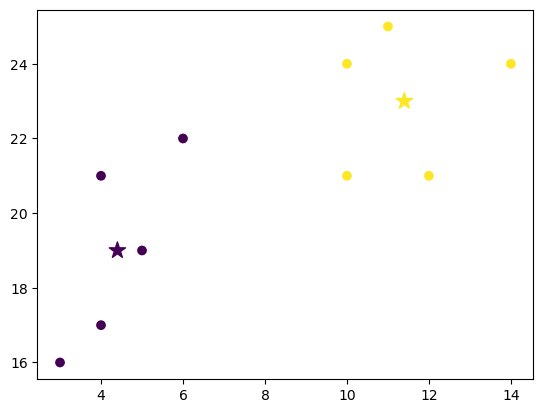

In [3]:
# Clusterize knowing there are 2 clusters

pairs = list(zip(features, targets))
inertias = []

kmeans_estimator = KMeans(n_clusters=2, n_init="auto")
kmeans_estimator.fit(pairs)
centroids = kmeans_estimator.cluster_centers_

plt.scatter(features, targets, c=kmeans_estimator.labels_)
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], c=list(range(len(centroids))), marker="*", s=150)
plt.show()

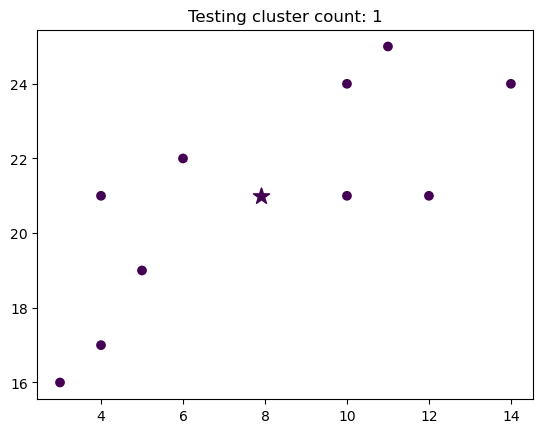

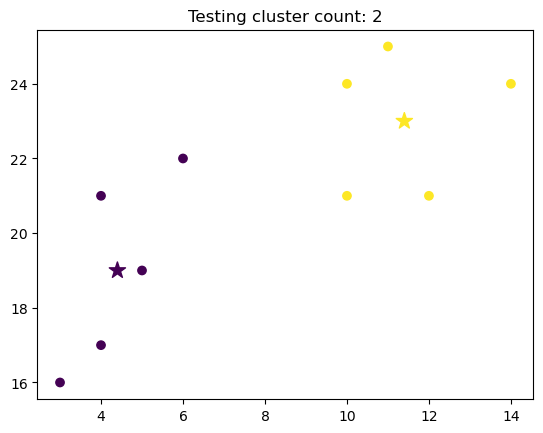

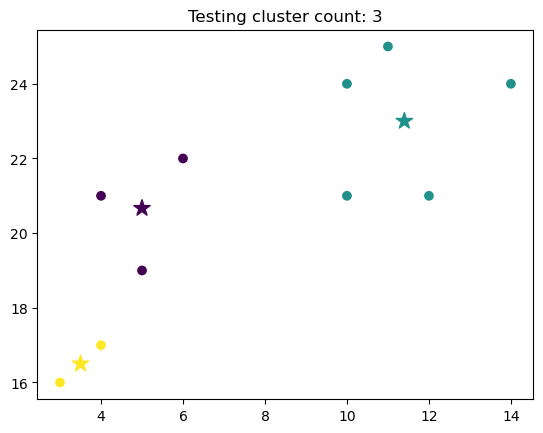

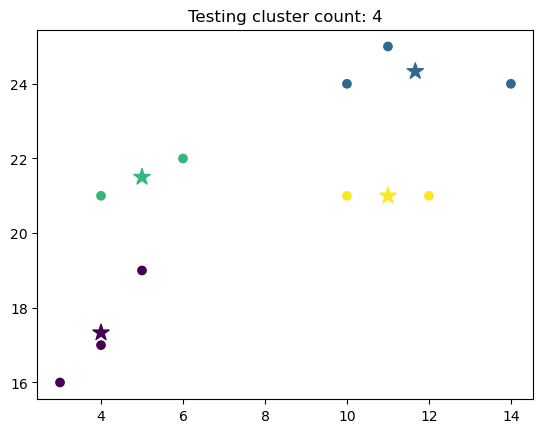

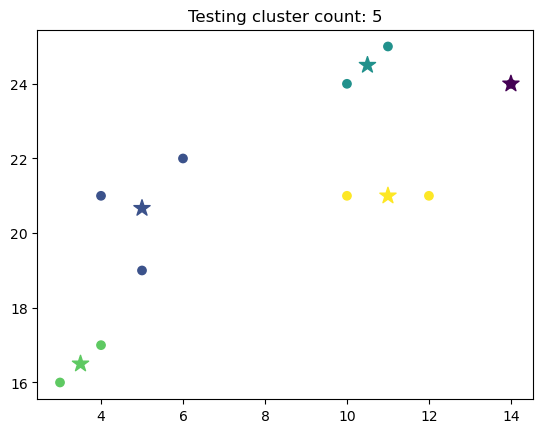

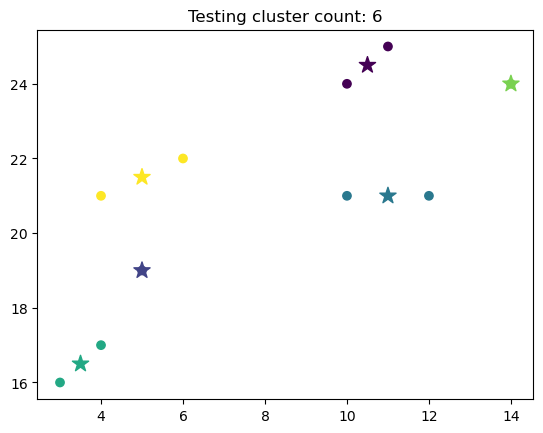

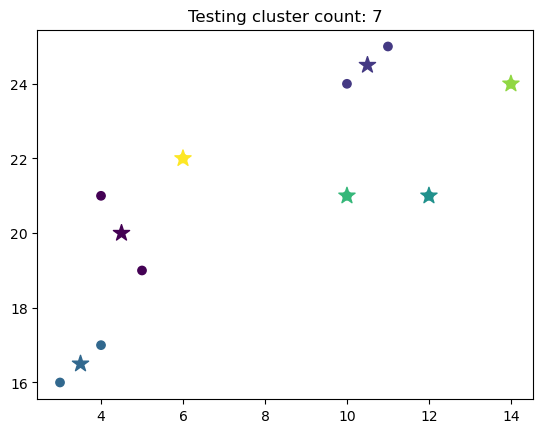

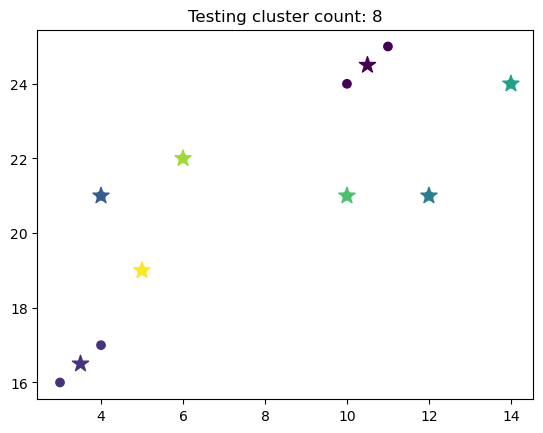

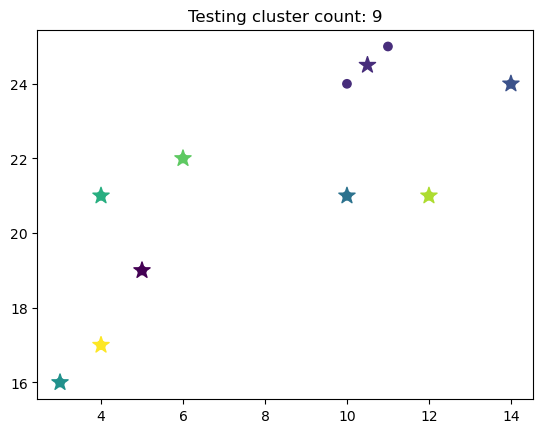

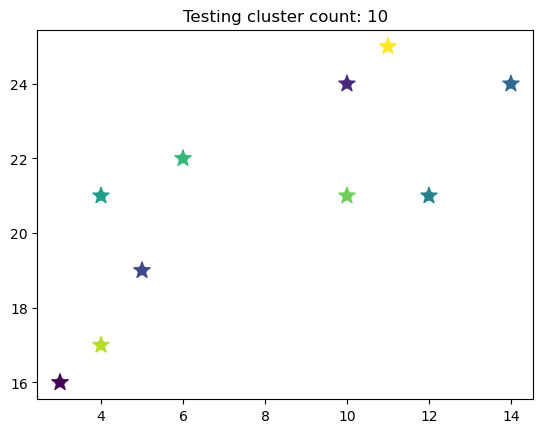

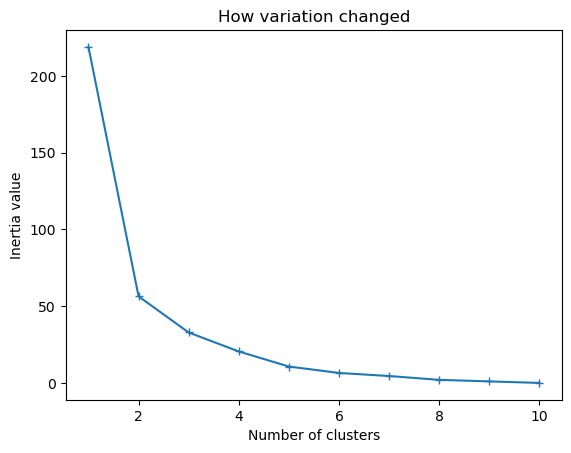

In [4]:
# Find the number of clusters present by clusterizing iteratively

pairs = list(zip(features, targets))
possible_cluster_counts = list(range(1, 11))
inertias = []

for possible_cluster_count in possible_cluster_counts:
    kmeans_estimator = KMeans(n_clusters=possible_cluster_count, n_init="auto")
    kmeans_estimator.fit(pairs)
    centroids = kmeans_estimator.cluster_centers_
    inertias.append(kmeans_estimator.inertia_)

    plt.title(f'Testing cluster count: {possible_cluster_count}')
    plt.scatter(features, targets, c=kmeans_estimator.labels_)
    plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], c=list(range(len(centroids))), marker="*", s=150)
    plt.show()


# This plot will tell us that 2 is the number of clusters here,
# since the drop in variation after 2 on x axis 
# is progressively less significant than from 1 to 2.
#
# Variation is a within-cluster sum-of-squares value.
#
# If you want to find this point programmatically, 
# measure the distance between each of points to a line drawn between first and last point
plt.plot(possible_cluster_counts, inertias, marker="+")
plt.title('How variation changed')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia value')
plt.show()